In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [41]:
df = pd.read_csv('fifa21.csv')

In [42]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [43]:
df.shape

(16155, 106)

In [44]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [45]:
df = df[['short_name', 'age', 'nationality', 'club_name', 'overall', 'potential',
    'value_eur', 'wage_eur', 'player_positions',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'
]]
df.dropna(inplace = True)

In [46]:
df.head()

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,27,Argentina,FC Barcelona,93,95,100500000,550000,CF,93.0,89.0,86.0,96.0,27.0,63.0
1,Cristiano Ronaldo,29,Portugal,Real Madrid,92,92,79000000,375000,"LW, LM",93.0,93.0,81.0,91.0,32.0,79.0
2,A. Robben,30,Netherlands,FC Bayern München,90,90,54500000,275000,"RM, LM, RW",93.0,86.0,83.0,92.0,32.0,64.0
3,Z. Ibrahimović,32,Sweden,Paris Saint-Germain,90,90,52500000,275000,ST,76.0,91.0,81.0,86.0,34.0,86.0
5,L. Suárez,27,Uruguay,FC Barcelona,89,91,49500000,300000,"ST, CF",83.0,87.0,79.0,88.0,42.0,79.0


In [47]:
df.duplicated().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14178 entries, 0 to 16154
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   short_name        14178 non-null  object 
 1   age               14178 non-null  int64  
 2   nationality       14178 non-null  object 
 3   club_name         14178 non-null  object 
 4   overall           14178 non-null  int64  
 5   potential         14178 non-null  int64  
 6   value_eur         14178 non-null  int64  
 7   wage_eur          14178 non-null  int64  
 8   player_positions  14178 non-null  object 
 9   pace              14178 non-null  float64
 10  shooting          14178 non-null  float64
 11  passing           14178 non-null  float64
 12  dribbling         14178 non-null  float64
 13  defending         14178 non-null  float64
 14  physic            14178 non-null  float64
dtypes: float64(6), int64(5), object(4)
memory usage: 1.7+ MB


## Exploratory Data Analysis

In [49]:
os.makedirs('charts', exist_ok=True)

In [50]:
#top 10 players by overall rating
top_overall = df.sort_values(by = 'overall', ascending = False).head(10)
top_overall[['short_name', 'overall', 'club_name']]

,short_name,overall,club_name
0,L. Messi,93,FC Barcelona
1,Cristiano Ronaldo,92,Real Madrid
2,A. Robben,90,FC Bayern München
3,Z. Ibrahimović,90,Paris Saint-Germain
5,L. Suárez,89,FC Barcelona
6,Iniesta,89,FC Barcelona
7,E. Hazard,88,Chelsea
8,R. van Persie,88,Manchester United
9,B. Schweinsteiger,88,FC Bayern München
10,F. Ribéry,88,FC Bayern München


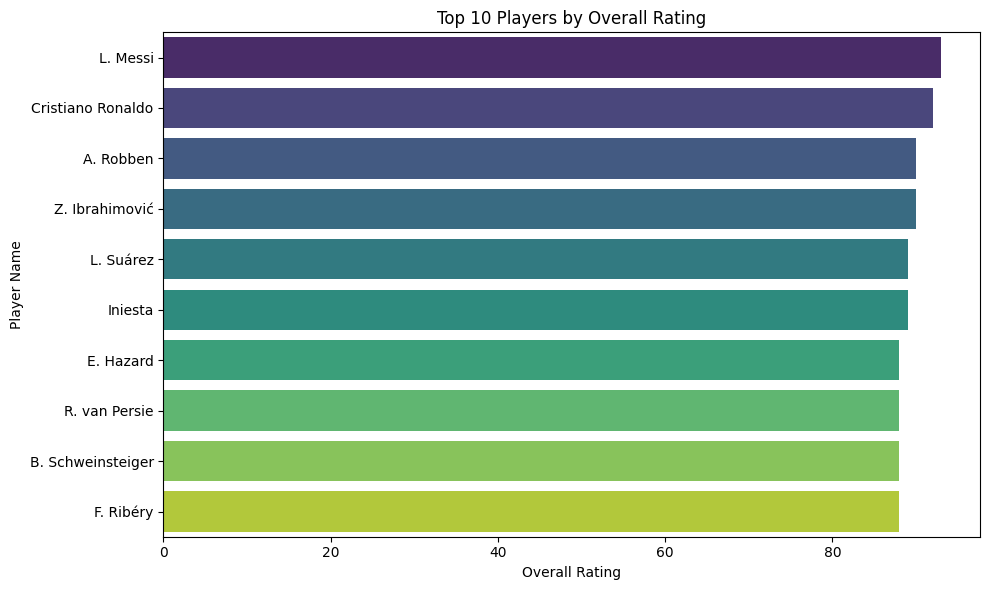

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x='overall', y='short_name', data=top_overall, hue = 'short_name', palette='viridis')
plt.title("Top 10 Players by Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Player Name")
plt.tight_layout()
plt.savefig('charts/top10_overall.png')
plt.show()

In [52]:
#top 10 players by market value
top_value = df.sort_values(by='value_eur', ascending=False).head(10)
top_value[['short_name', 'club_name', 'value_eur']]

,short_name,club_name,value_eur
0,L. Messi,FC Barcelona,100500000
1,Cristiano Ronaldo,Real Madrid,79000000
2,A. Robben,FC Bayern München,54500000
3,Z. Ibrahimović,Paris Saint-Germain,52500000
5,L. Suárez,FC Barcelona,49500000
11,Falcao,Manchester United,46500000
26,S. Agüero,Manchester City,45500000
23,A. Di María,Manchester United,45500000
27,M. Özil,Arsenal,44000000
13,R. Lewandowski,FC Bayern München,44000000


In [53]:
top_value['value_million'] = top_value['value_eur'] / 1e6

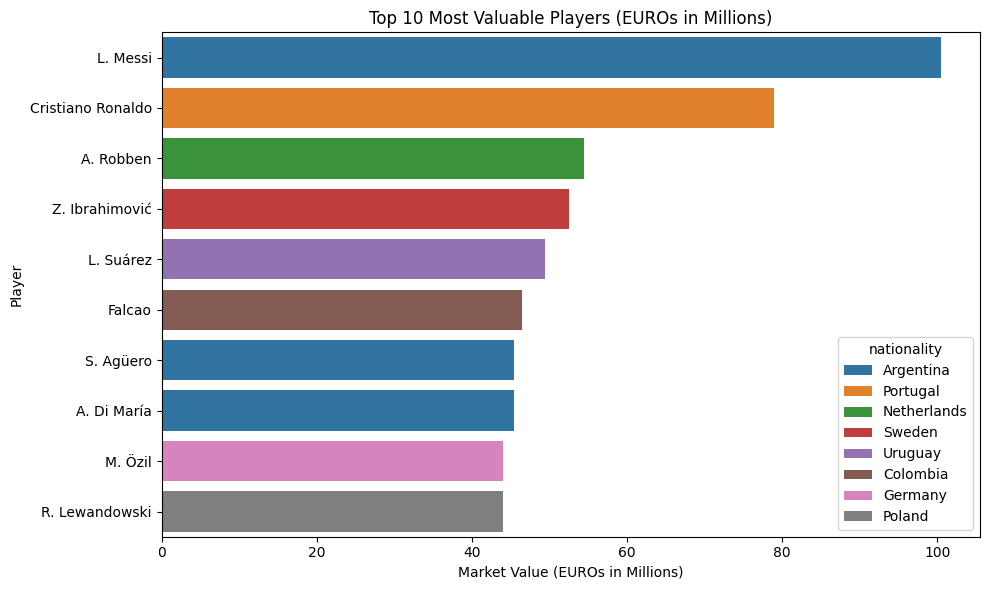

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='value_million', y='short_name', data=top_value, hue='nationality', palette='tab10')
plt.title("Top 10 Most Valuable Players (EUROs in Millions)")
plt.xlabel("Market Value (EUROs in Millions)")
plt.ylabel("Player")
plt.tight_layout()
plt.savefig('charts/top10_value.png')
plt.show()

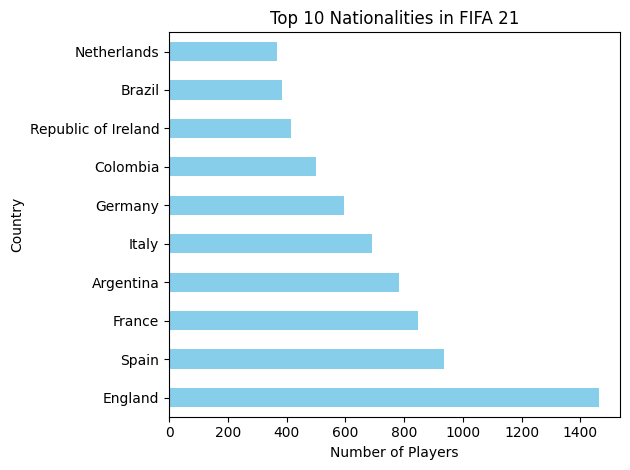

In [61]:
#players per country - top 10
top_countries = df['nationality'].value_counts().head(10)
top_countries.plot(kind = 'barh', color = 'skyblue')
plt.title("Top 10 Nationalities in FIFA 21")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('charts/top10_countries.png')
plt.show()

## Visualization

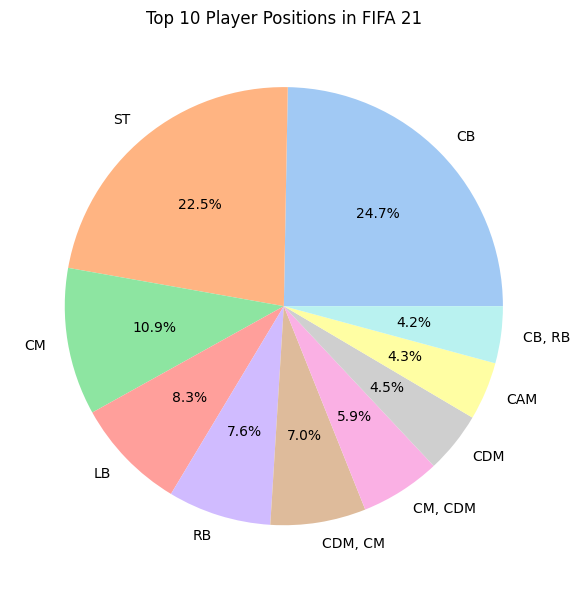

In [66]:
#player disrtibution by positions
top_positions = df['player_positions'].value_counts().head(10)
top_positions.plot.pie(autopct = '%1.1f%%', figsize=(10, 6), colors=sns.color_palette('pastel'))
plt.title("Top 10 Player Positions in FIFA 21")
plt.ylabel("")
plt.tight_layout()
plt.savefig('charts/top10_positions_pie.png')
plt.show()

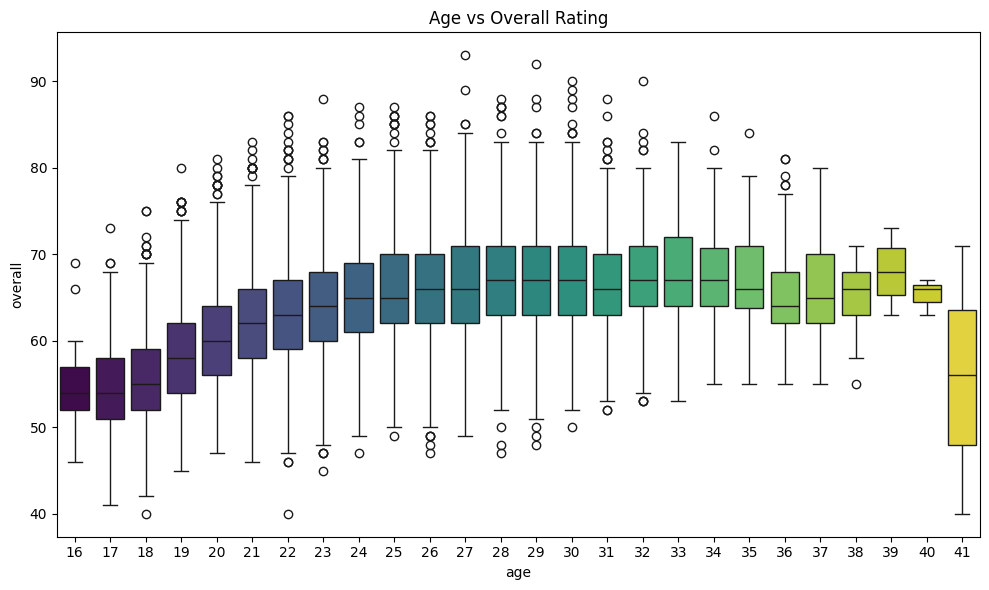

In [68]:
#age vs overall 
plt.figure(figsize = (10, 6))
sns.boxplot(x='age', y='overall', data=df, hue='age', palette='viridis', legend=False)
plt.title("Age vs Overall Rating")
plt.tight_layout()
plt.savefig('charts/age_vs_overall.png')
plt.show()

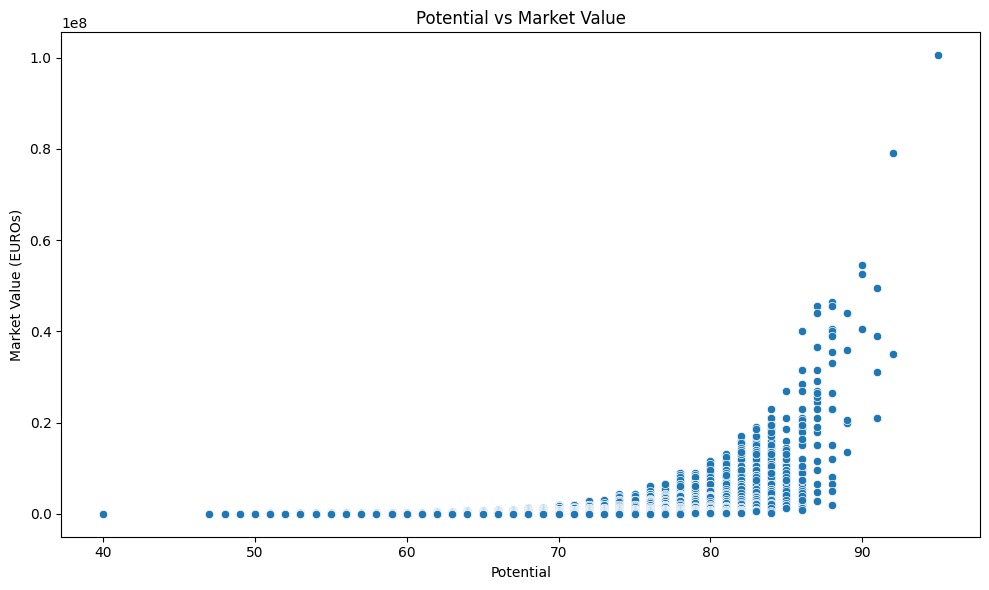

In [70]:
#potential vs market value
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'potential', y = 'value_eur', data = df)
plt.title("Potential vs Market Value")
plt.xlabel("Potential")
plt.ylabel("Market Value (EUROs)")
plt.tight_layout()
plt.savefig('charts/potential_vs_value.png')
plt.show()

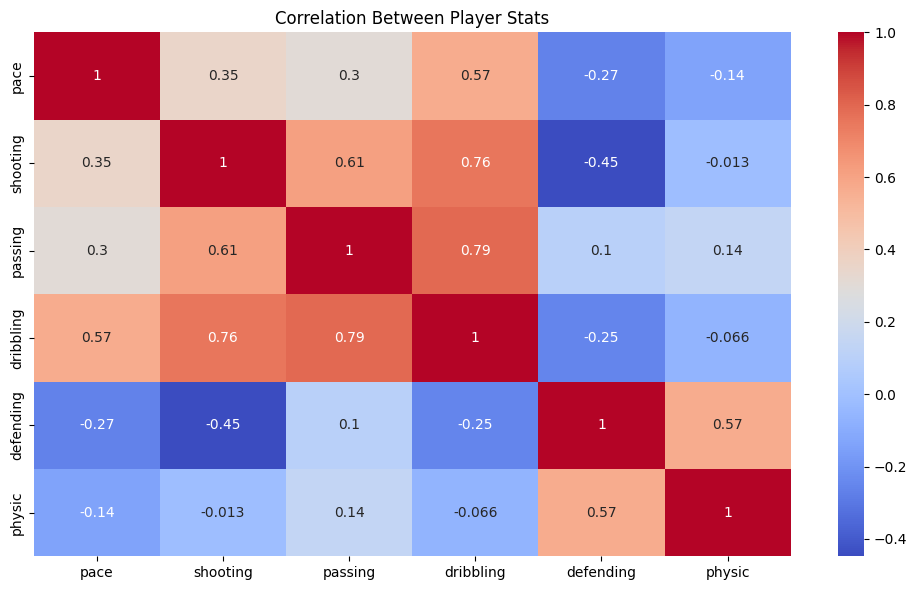

In [71]:
#correlation heatmap for stats
plt.figure(figsize = (10, 6))
numeric_stats = df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
sns.heatmap(numeric_stats.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Between Player Stats")
plt.tight_layout()
plt.savefig('charts/correlation_heatmap.png')
plt.show()